# Project: Predicting the Top Artists from a Spotify Dataset (2023)


## Introduction
In this project, we aim to predict the top artist from a Spotify dataset for the year 2023. We will analyze the dataset, explore various features, and build a predictive model to determine which artists are most likely to be the top artists based on streaming data.

---

# 1. Import Libraries


In [1]:
# Base libraries
import numpy as np
import pandas as pd

# Plotting libraries
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly.express as px

# Plotting configurations
%matplotlib inline
plt.style.use("fivethirtyeight")

# Preprocessing and scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# Model selection and evaluation
from sklearn.model_selection import (GridSearchCV, train_test_split, learning_curve, cross_val_score)
from sklearn.metrics import (classification_report, accuracy_score, precision_score, 
                             recall_score, f1_score, roc_curve, auc, roc_auc_score, 
                             confusion_matrix)
                             
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils.class_weight import compute_class_weight

# Tree visualization
from sklearn.tree import plot_tree

# Dimensionality reduction and clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Utility for saving models
import joblib

# Neural Networks with Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Handling class imbalance
from imblearn.over_sampling import SMOTE

C:\Users\sacha\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 2. Load the Dataset


In [2]:
# Load the CSV dataset (replace 'file.csv' with the correct file path)
file_path = r'spotify-2023.csv'

# Specify encoding if necessary
# Attempt to read the CSV file with UTF-8 encoding, which is common
try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    # Fallback to Latin1 encoding if UTF-8 fails
    df = pd.read_csv(file_path, encoding='latin1')
except Exception as e:
    # Catch any other exceptions and print an error message
    print(f"Error while loading the file: {e}")
    exit()

# Display the first few rows of the dataset to verify correct loading
print("First rows of the dataset:")
print(df.head())  # Use .head() to show the first 5 rows instead of all rows for better readability

First rows of the dataset:
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                14

# 3. Data Exploration

In [3]:
# Calculate the number of missing values per column
missing_values = df.isnull().sum()

# Display the results
print("\nMissing values per column:")
print(missing_values)

# Optionally, display only the columns that have missing values
missing_values = missing_values[missing_values > 0]
print("\nColumns with missing values:")
print(missing_values)


Missing values per column:
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

Columns with missing values:
in_shazam_charts    50
key                 95
dtype: int64


In [4]:
df.duplicated().sum()

0

In [5]:
#here we are checking if there are any songs that comes more than once

df[df.duplicated(subset=['track_name','artist(s)_name'])]

track_name artist(s)_name  artist_count  released_year  \
482  SPIT IN MY FACE!       ThxSoMch             1           2022   
616    Take My Breath     The Weeknd             1           2021   
764   About Damn Time          Lizzo             1           2022   
873              SNAP      Rosa Linn             1           2022   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
482              10            31                   573                  0   
616               8             6                  6392                  0   
764               4            14                  9021                  0   
873               3            19                  1818                  0   

       streams  in_apple_playlists  ...  bpm  key   mode danceability_%  \
482  301869854                   1  ...  166   C#  Major             70   
616  432702334                 174  ...  121   G#  Major             75   
764  723894473                 242  ...  109   A#  Minor             84   
873  711366595                   3  ...  170  NaN  Major             56   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
482         57       57              9                  20          11   
616         53       74              2                   0          11   
764         72       74             10                   0          34   
873         52       64             11                   0          45   

     speechiness_%  
482              7  
616              5  
764              7  
873              7  

[4 rows x 24 columns]

In [6]:
# displaying the songs that are duplicated to see the differences

songs=['SPIT IN MY FACE!', 'Take My Breath', 'About Damn Time', 'SNAP']

matching_songs = df[df["track_name"].isin(songs)]

# Display the matching rows
print(matching_songs)

           track_name artist(s)_name  artist_count  released_year  \
178              SNAP      Rosa Linn             1           2022   
345  SPIT IN MY FACE!       ThxSoMch             1           2022   
372   About Damn Time          Lizzo             1           2022   
482  SPIT IN MY FACE!       ThxSoMch             1           2022   
512    Take My Breath     The Weeknd             1           2021   
616    Take My Breath     The Weeknd             1           2021   
764   About Damn Time          Lizzo             1           2022   
873              SNAP      Rosa Linn             1           2022   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
178               3            19                  3202                 18   
345              10            31                   629                 14   
372               7            15                  2332                  2   
482              10            31                   573           

In [7]:
# Since we have duplicated songs, # We are keeping the song with the highest streams for each (track_name, artist_name) pair,
# assuming it represents the most recent or popular version.

df_filt = df.loc[df.groupby(["track_name", "artist(s)_name"])["streams"].idxmax()]

# Display the result
print(df_filt)

                       track_name       artist(s)_name  artist_count  \
640              'Till I Collapse    Eminem, Nate Dogg             2   
53   (It Goes Like) Nanana - Edit            Peggy Gou             1   
817    10 Things I Hate About You            Leah Kate             1   
303                         10:35  Tiï¿½ï¿½sto, Tate M             2   
924       2 Be Loved (Am I Ready)                Lizzo             1   
..                            ...                  ...           ...   
614            you broke me first           Tate McRae             1   
355                  ýýý98 Braves        Morgan Wallen             1   
500                    ýýýabcdefu                Gayle             1   
174                  ýýýýýýýýýýýý              YOASOBI             1   
374         ýýýýýýýýýýýýýýýýýýýýý           Fujii Kaze             1   

     released_year  released_month  released_day  in_spotify_playlists  \
640           2002               5            26             

In [8]:
df_filt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 640 to 374
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            949 non-null    object
 1   artist(s)_name        949 non-null    object
 2   artist_count          949 non-null    int64 
 3   released_year         949 non-null    int64 
 4   released_month        949 non-null    int64 
 5   released_day          949 non-null    int64 
 6   in_spotify_playlists  949 non-null    int64 
 7   in_spotify_charts     949 non-null    int64 
 8   streams               949 non-null    object
 9   in_apple_playlists    949 non-null    int64 
 10  in_apple_charts       949 non-null    int64 
 11  in_deezer_playlists   949 non-null    object
 12  in_deezer_charts      949 non-null    int64 
 13  in_shazam_charts      899 non-null    object
 14  bpm                   949 non-null    int64 
 15  key                   855 non-null    objec

In [9]:
# Converting the 'streams' column to numeric by extracting the digits and handling errors by coercing non-numeric values to NaN,
# then casting the result to integers.

df_filt['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df_filt['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df_filt['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

In [10]:
df_filt.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists     79
in_deezer_charts         0
in_shazam_charts        57
bpm                      0
key                     94
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [11]:
# Fill missing numerical columns with the median
df_filt['in_deezer_playlists'].fillna(df_filt['in_deezer_playlists'].median(), inplace=True)
df_filt['in_shazam_charts'].fillna(df_filt['in_shazam_charts'].median(), inplace=True)

# Fill missing values for the 'key' column with the most frequent category
df_filt['key'].fillna(df_filt['key'].mode()[0], inplace=True)

C:\Users\sacha\AppData\Local\Temp\ipykernel_9676\1671987568.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filt['in_deezer_playlists'].fillna(df_filt['in_deezer_playlists'].median(), inplace=True)
C:\Users\sacha\AppData\Local\Temp\ipykernel_9676\1671987568.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [12]:
df_filt.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 1
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [13]:
df_filt['streams']=df_filt['streams'].fillna(df_filt['streams'].median())
df_filt.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

## 3.1 Splitting Songs with Multiple Artists into Individual Entries

In [14]:
# Split the 'artist(s)_name' column into separate rows and create a new dataset
# Each artist listed in the column will have its own row
artists_split = df_filt['artist(s)_name'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)

# Create a new dataset by keeping the other columns intact
new_data = df_filt.loc[artists_split.index].copy()  # Duplicate rows for each artist
new_data['Artist'] = artists_split.str.strip()  # Add the split artist names as a new column and strip whitespace

# Optionally, remove the original 'artist(s)_name' column from the new dataset
new_data = new_data.drop(columns=['artist(s)_name'])

# Save the new dataset to a CSV file or use it for further analysis
new_data.to_csv("new_dataset.csv", index=False)  # Save without the index
print(new_data)  # Display the new dataset

                       track_name  artist_count  released_year  \
640              'Till I Collapse             2           2002   
640              'Till I Collapse             2           2002   
53   (It Goes Like) Nanana - Edit             1           2023   
817    10 Things I Hate About You             1           2022   
303                         10:35             2           2022   
..                            ...           ...            ...   
614            you broke me first             1           2020   
355                  ýýý98 Braves             1           2023   
500                    ýýýabcdefu             1           2021   
174                  ýýýýýýýýýýýý             1           2023   
374         ýýýýýýýýýýýýýýýýýýýýý             1           2020   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
640               5            26                 22923                  0   
640               5            26                 2

In [15]:
# Drop unnecessary columns from the dataset
columns_to_drop = ['track_name', 'artist_count', 'released_year', 'released_month', 
    'released_day']

new_data = new_data.drop(columns=columns_to_drop)

# Display the updated dataset after dropping the columns
print("Updated dataset after dropping unnecessary columns:")
print(new_data)

# Calculate the number of songs for each artist
# Group the dataset by the 'Artist' column and count the occurrences
songs_count = new_data.groupby('Artist').size().reset_index(name='num_songs')

# Merge the song count back into the main dataset
# Adding the 'num_songs' column to indicate the number of songs per artist
new_data = new_data.merge(songs_count, on='Artist', how='left')

# Display the updated dataset with the 'num_songs' column
print("Updated dataset with the 'num_songs' column:")
print(new_data)

Updated dataset after dropping unnecessary columns:
     in_spotify_playlists  in_spotify_charts       streams  \
640                 22923                  0  1.695712e+09   
640                 22923                  0  1.695712e+09   
53                   2259                 59  5.787644e+07   
817                  1301                  0  1.855509e+08   
303                  4942                 26  3.255924e+08   
..                    ...                ...           ...   
614                  6638                  0  1.180095e+09   
355                   282                  0  5.653327e+07   
500                  7215                  0  1.007612e+09   
174                   356                 16  1.435738e+08   
374                   685                 14  4.030974e+08   

     in_apple_playlists  in_apple_charts  in_deezer_playlists  \
640                  78               46                 36.0   
640                  78               46                 36.0   
53      

## 3.2 Aggregating Artist Data: Aggregating Multiple Entries per Artist

In [16]:
# Group by 'Artist' and calculate aggregates for each column
# The aggregation includes sum for streams and playlists, and mean for other metrics
new_data = new_data.groupby('Artist', as_index=False).agg({
    'streams': 'sum',                        # Total streams for each artist
    'in_spotify_charts': 'mean',             # Average inclusion in Spotify charts
    'in_apple_charts': 'mean', # Average inclusion in Apple charts
    'in_deezer_charts':'mean',
    'in_shazam_charts':'mean',
    'bpm': 'mean',                           # Average BPM (tempo)
    'danceability_%': 'mean',                # Average danceability percentage
    'valence_%': 'mean',                     # Average valence (positivity) percentage
    'energy_%': 'mean',                      # Average energy percentage
    'acousticness_%': 'mean',                # Average acousticness percentage
    'instrumentalness_%': 'mean',            # Average instrumentalness percentage
    'liveness_%': 'mean',                    # Average liveness percentage
    'speechiness_%': 'mean',                 # Average speechiness percentage
    'in_spotify_playlists': 'sum',           # Total number of Spotify playlists featuring the artist
    'in_apple_playlists': 'sum',             # Total number of Apple playlists featuring the artist
    'in_deezer_playlists': 'sum',             # Total number of Deezer playlists featuring the artist
    'key': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'mode': lambda x: x.mode().iloc[0] if not x.mode().empty else None
})

# Add the 'num_songs' column to the grouped dataset
# This column indicates the number of top songs for each artist
new_data = new_data.merge(songs_count, on='Artist', how='left')

# Display the resulting dataset
print("Aggregated dataset grouped by artist:")
print(new_data)

Aggregated dataset grouped by artist:
                Artist       streams  in_spotify_charts  in_apple_charts  \
0                       1.877726e+08           4.000000         3.000000   
1             (G)I-DLE  2.669833e+08          19.500000       121.000000   
2            070 Shake  7.166451e+08          12.500000        42.500000   
3            21 Savage  4.099216e+09           9.642857        37.714286   
4             24kgoldn  1.699402e+09           0.000000        27.000000   
..                 ...           ...                ...              ...   
694  sped up nightcore  2.070333e+08          10.000000         0.000000   
695               teto  1.391938e+08           2.000000         2.000000   
696          unxbected  5.805481e+07          50.000000        52.000000   
697           utku INC  9.059852e+07           0.000000         0.000000   
698             zzoilo  5.782079e+08           2.000000        13.000000   

     in_deezer_charts  in_shazam_charts         b

In [17]:
new_data.isnull().sum()

Artist                  0
streams                 0
in_spotify_charts       0
in_apple_charts         0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
in_spotify_playlists    0
in_apple_playlists      0
in_deezer_playlists     0
key                     0
mode                    0
num_songs               0
dtype: int64

In [18]:
new_data=new_data.iloc[1:]
new_data.reset_index(drop=True, inplace=True)
new_data.head()

Artist       streams  in_spotify_charts  in_apple_charts  \
0   (G)I-DLE  2.669833e+08          19.500000       121.000000   
1  070 Shake  7.166451e+08          12.500000        42.500000   
2  21 Savage  4.099216e+09           9.642857        37.714286   
3   24kgoldn  1.699402e+09           0.000000        27.000000   
4       2Pac  5.793951e+08           0.000000        17.000000   

   in_deezer_charts  in_shazam_charts         bpm  danceability_%  valence_%  \
0          0.000000         79.500000  133.000000       77.500000  67.000000   
1          9.000000        178.000000  102.000000       49.000000  31.500000   
2          1.714286         13.428571  130.357143       73.428571  29.142857   
3          0.000000          2.000000   91.000000       70.000000  76.000000   
4          0.000000          0.000000   92.000000       77.000000  76.000000   

    energy_%  acousticness_%  instrumentalness_%  liveness_%  speechiness_%  \
0  87.000000        3.500000                 0.0        37.5           11.5   
1  75.500000       11.500000                 0.0         9.0           15.5   
2  57.928571        6.142857                 0.0        18.5           20.0   
3  72.000000       22.000000                 0.0        27.0            4.0   
4  84.000000        3.000000                 0.0        38.0            4.0   

   in_spotify_playlists  in_apple_playlists  in_deezer_playlists key   mode  \
0                   881                  24                 16.0   E  Minor   
1                  6497                 128                125.0   D  Major   
2                 36811                 488                510.0  C#  Major   
3                 12854                 237                636.0   G  Minor   
4                 18773                 128                 36.0   G  Major   

   num_songs  
0          2  
1          2  
2         14  
3          1  
4          1

## 3.3 Identifying Outliers in the column Streams 

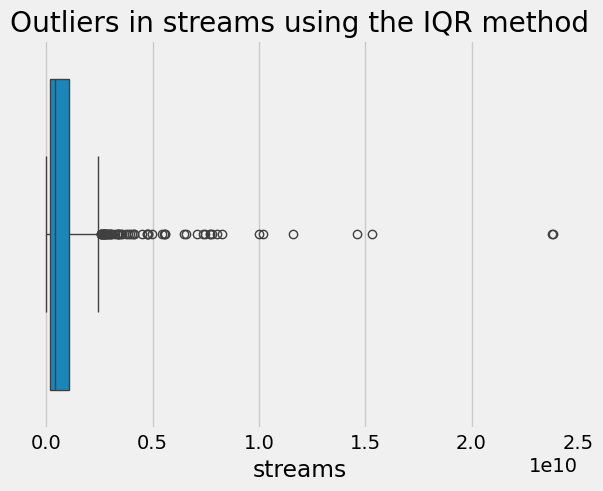

In [19]:
# Select a numeric column to analyze outliers
# Select a numeric column to analyze outliers
column = 'streams'

df=new_data
# Ensure the column is numeric and handle NaN values
df[column] = pd.to_numeric(df[column], errors='coerce')  # Convert to numeric, replacing errors with NaN
df = df.dropna(subset=[column])  # Drop rows with NaN in the specified column

# --- IQR Method ---
# Calculate Q1, Q3, and IQR
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]

# Visualize a boxplot for the IQR method
sns.boxplot(data=df, x=column)
plt.title(f"Outliers in {column} using the IQR method")
plt.show()

In [20]:
# Print all unique outliers
print(f"\nTotal unique outliers (count: {len(outliers)}):")
print(outliers)


Total unique outliers (count: 63):
                Artist       streams  in_spotify_charts  in_apple_charts  \
2            21 Savage  4.099216e+09           9.642857        37.714286   
17               Adele  4.508747e+09          17.250000        82.750000   
47      Arctic Monkeys  5.569807e+09          47.500000        85.000000   
48       Ariana Grande  3.827252e+09          13.000000        86.250000   
53              Avicii  3.426755e+09          21.000000       141.000000   
..                 ...           ...                ...              ...   
619      The Kid Laroi  3.057624e+09          12.000000        37.333333   
622  The Neighbourhood  4.010010e+09          25.666667        86.333333   
628         The Weeknd  2.379910e+10          15.416667        70.222222   
637        Tones and I  2.864792e+09           0.000000       167.000000   
666             WizKid  2.746684e+09          12.000000        58.500000   

     in_deezer_charts  in_shazam_charts         bpm

### Note: 
Upon reviewing the data, it is important to note that many of the identified outliers are actually highly popular songs with exceptionally high stream counts. These are not errors in the data but rather reflect the massive popularity of these tracks

## 3.4 Creating the column rank_score based on chart positions

In [21]:
# Replace null values (unranked songs) with a high position (e.g., 1000)
new_data[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']] = \
    new_data[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']].fillna(1000)

# Replace positions equal to 0 with a high position (e.g., 1000)
new_data[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']] = \
    new_data[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']].replace(0, 1000)

# Computing the Rank Score
new_data['rank_score'] = (1 / new_data['in_spotify_charts']) + \
                         (1 / new_data['in_apple_charts']) + \
                         (1 / new_data['in_deezer_charts'])

# Check the values
new_data[['Artist', 'rank_score']].head()

Artist  rank_score
0   (G)I-DLE    0.060547
1  070 Shake    0.214641
2  21 Savage    0.713552
3   24kgoldn    0.039037
4       2Pac    0.060824

# 4 Data Visualization

## 4.1 Visualizing Data Distributions 


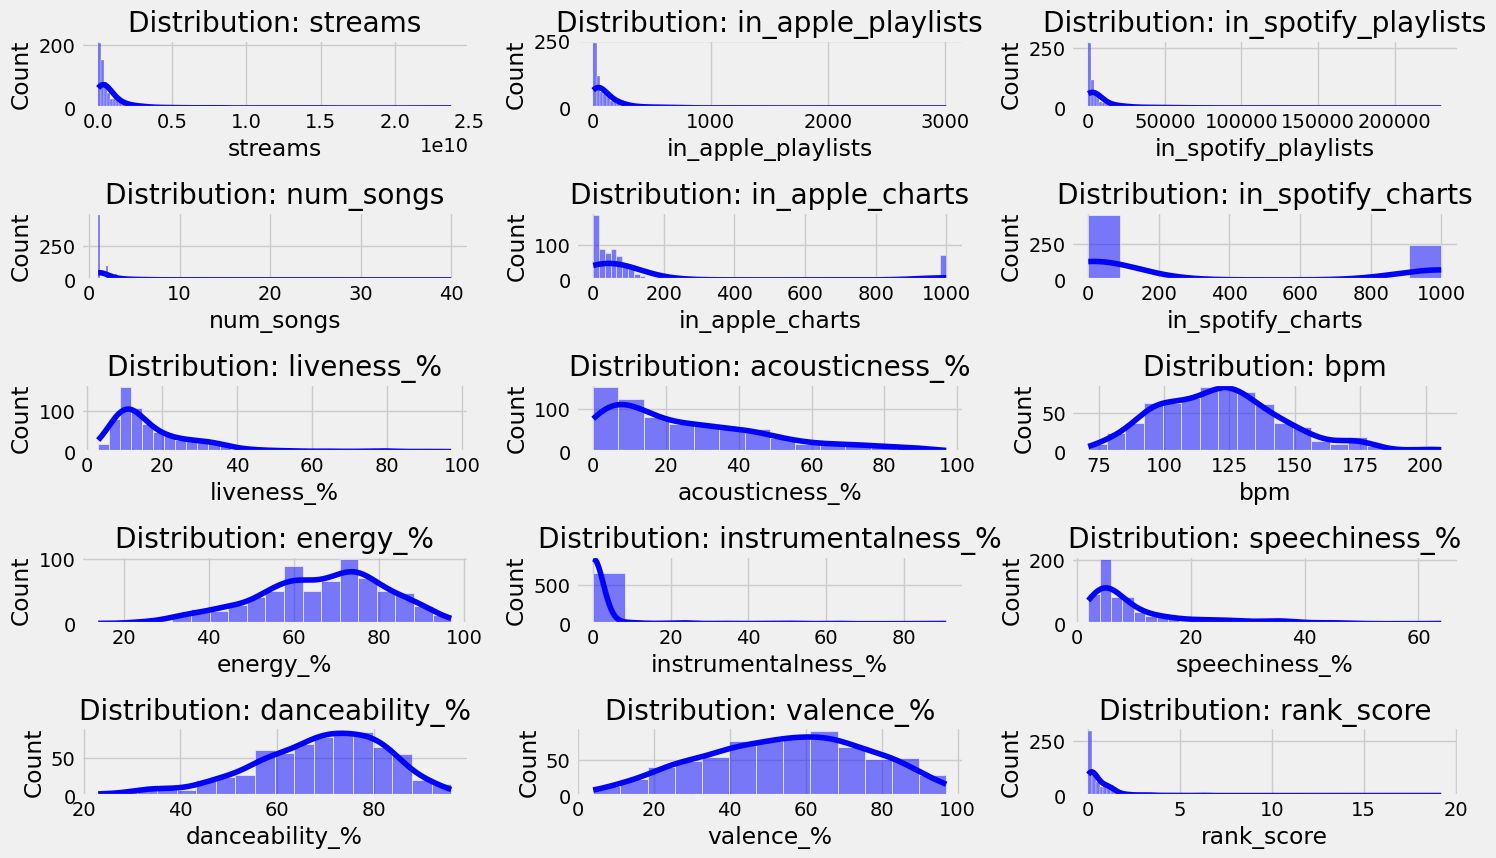

In [22]:
numeric_columns = ['streams','in_apple_playlists', 'in_spotify_playlists', 'num_songs', 
                   'in_apple_charts', 'in_spotify_charts', 'liveness_%', 
                   'acousticness_%', 'bpm', 'energy_%', 'instrumentalness_%', 
                   'speechiness_%', 'danceability_%', 'valence_%', 'rank_score']  # Features

# Verify which columns are available in the dataset
numeric_columns = [col for col in numeric_columns if col in new_data.columns]


# Check distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot((len(numeric_columns) // 3) + 1, 3, i + 1)
    sns.histplot(new_data[col], kde=True, color='blue')
    plt.title(f'Distribution: {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

## 4.2 Top 10 Artists by Streams


In [23]:
# Filter the top 10 artists by the number of streams
top_10_artists = new_data.nlargest(10, 'streams')

# Create the interactive bar chart
fig = px.bar(
    top_10_artists,  # Filtered data for the top 10 artists
    x='Artist',  # X-axis for artist names
    y='streams',  # Y-axis for streams
    title='Top 10 Artists by Streams',  # Chart title
    labels={'streams': 'Streams (in millions)', 'Artist': 'Artist'},  # Custom axis labels
    text='streams',  # Show stream values on the bars
    color='Artist'   # Different colors for each artist
)

# Customize the layout
fig.update_traces(
    texttemplate='%{text:.2f}',  # Format displayed values to two decimal places
    textposition='outside'  # Position text outside the bars
)

# Further customize the layout
fig.update_layout(
    xaxis_title='Artist',
    yaxis_title='Streams (in millions)',
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

# Show the chart
fig.show()

C:\Users\sacha\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


## 4.3 Top 10 Songs by Streams


In [24]:
# Filter the top 10 artists by the number of streams
top_10_artists = df_filt.nlargest(10, 'streams')

# Create the interactive bar chart
fig = px.bar(
    top_10_artists,  # Filtered data for the top 10 artists
    x='track_name',  # X-axis for artist names
    y='streams',  # Y-axis for streams
    title='Top 10 Songs by Streams',  # Chart title
    labels={'streams': 'Streams (in millions)', 'Artist': 'Artist'},  # Custom axis labels
    text='streams',  # Show stream values on the bars
    color='track_name'   # Different colors for each artist
)

# Customize the layout
fig.update_traces(
    texttemplate='%{text:.2f}',  # Format displayed values to two decimal places
    textposition='outside'  # Position text outside the bars
)

# Further customize the layout
fig.update_layout(
    xaxis_title='track_name',
    yaxis_title='Streams (in millions)',
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

# Show the chart
fig.show()

C:\Users\sacha\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## 4.4 Streams by Release Year


C:\Users\sacha\AppData\Local\Temp\ipykernel_9676\714320793.py:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




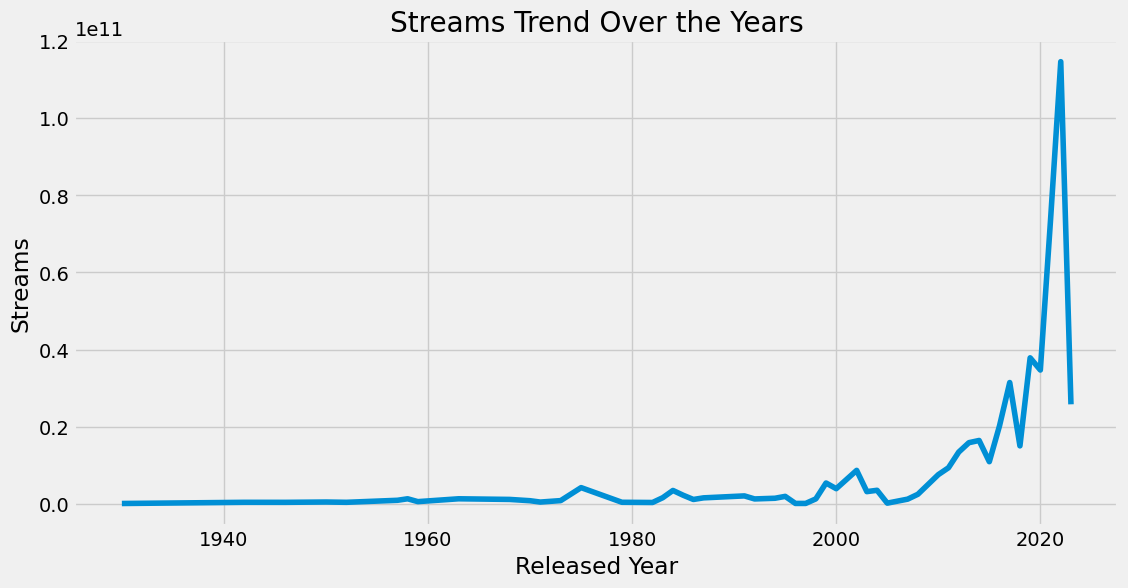

In [25]:
# Group the dataset by 'released_year' and sum the streams for each year
df_yearly = df_filt.groupby('released_year')['streams'].sum().reset_index()

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create a line plot to visualize the trend of streams over the years
sns.lineplot(x=df_yearly['released_year'], y=df_yearly['streams'], ci=None)

# Set the title of the plot
plt.title('Streams Trend Over the Years')

# Label the x-axis as the release year
plt.xlabel('Released Year')

# Label the y-axis as the total number of streams
plt.ylabel('Streams')

# Display the plot
plt.show()


## 4.5 Distribution of Release Months


C:\Users\sacha\AppData\Local\Temp\ipykernel_9676\4194100476.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




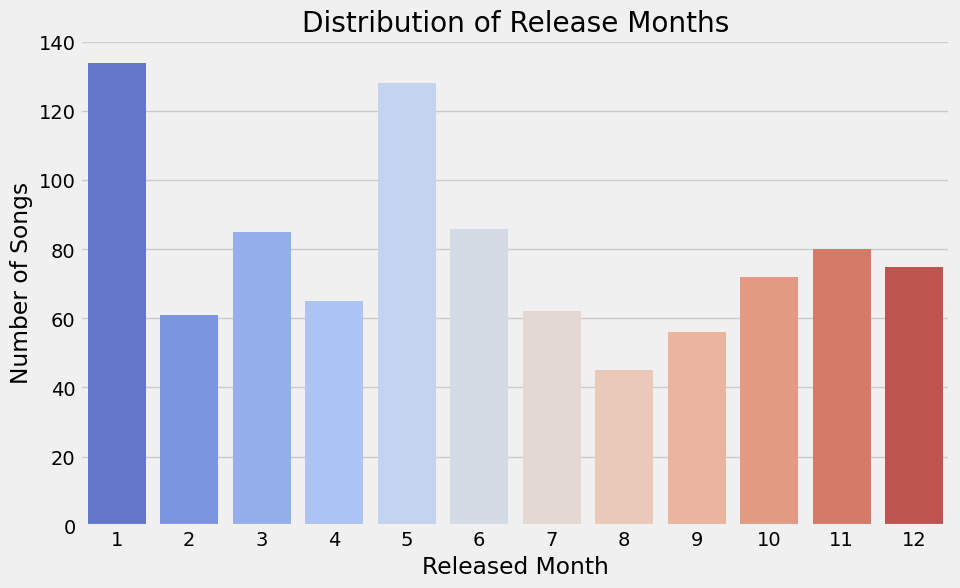

In [26]:
plt.figure(figsize=(10,6))

sns.countplot(x='released_month', data=df_filt, palette='coolwarm')
plt.title('Distribution of Release Months')
plt.xlabel('Released Month')
plt.ylabel('Number of Songs')
plt.show()

### 4.6 Top 10 Artists with Most Songs in the Dataset 


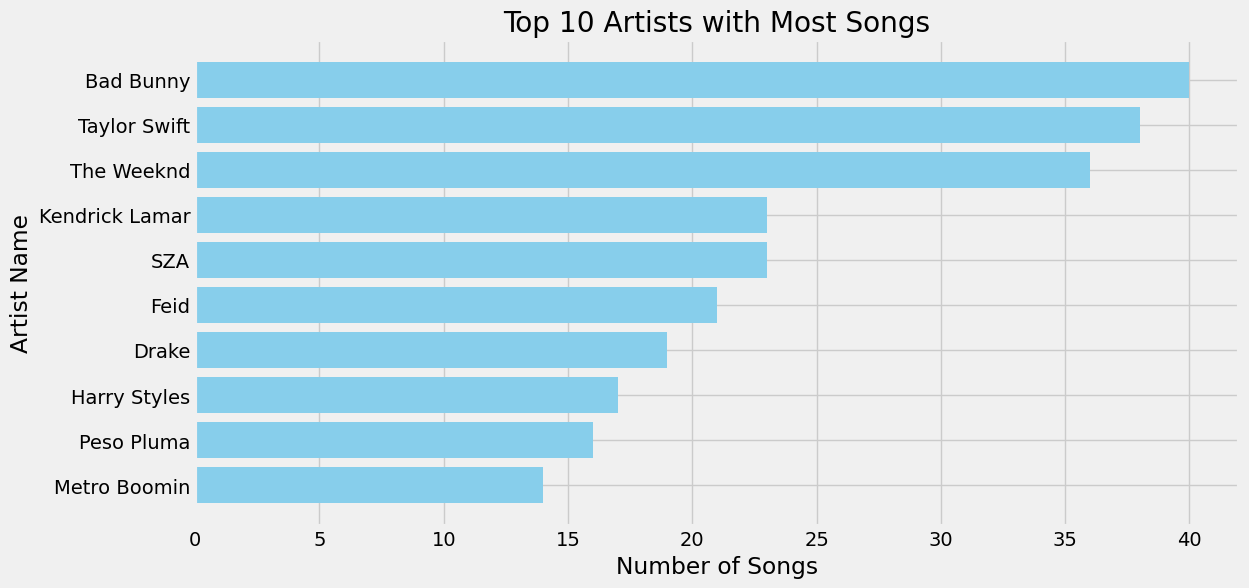

In [27]:
# Sort by the number of top songs directly
artist_counts = new_data[['Artist', 'num_songs']].sort_values(by='num_songs', ascending=False)

# Plot for the top 10 artists with the most songs
plt.figure(figsize=(12, 6))
plt.barh(artist_counts['Artist'].head(10), artist_counts['num_songs'].head(10), color='skyblue')
plt.title('Top 10 Artists with Most Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist Name')
plt.gca().invert_yaxis()  # Artist with most songs at the top
plt.show()

## 4.7 Correlation Heatmap of Numeric Variables


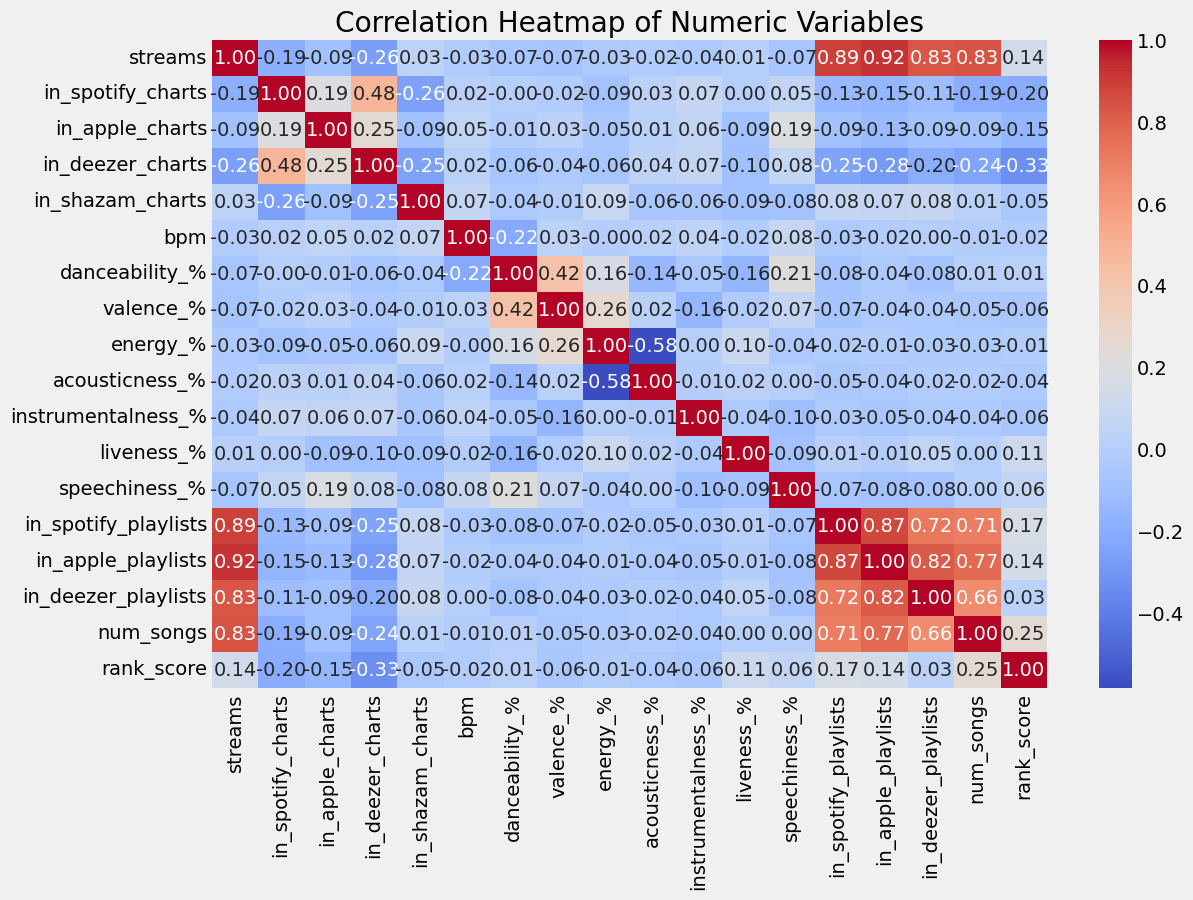

In [28]:
# Correlation heatmap for numeric variables
plt.figure(figsize=(12,8))
numeric_columns= new_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = new_data[numeric_columns].corr()
sns.heatmap(correlation_matrix,annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

#### The correlation matrix shows that variables such as streams, in_spotify_playlists, in_apple_playlists, and num_songs are strongly correlated, highlighting the importance of playlist presence for musical success. Sound-related variables (bpm, speechiness_%, liveness_%) show low correlations with streams.   
#### Despite the high correlations, we will keep all variables as we will use Machine Learning models, which are not sensitive to multicollinearity.

# 5. Identifying Top 10% Artists Based on Stream Counts

In [29]:
# Sort artists by the number of streams (from highest to lowest)
new_data_sorted = new_data.sort_values('streams', ascending=False)

# Determine the threshold for the top 10% of artists
top_10_percent_threshold = new_data_sorted['streams'].quantile(0.90)

# Create the 'top_artist' column: 1 for artists in the top 10%, otherwise 0
new_data['top_artist'] = (new_data['streams'] >= top_10_percent_threshold).astype(int)

# Check the values
print(new_data[['Artist',  'streams', 'top_artist']].head())

# Check class balance
print('Check for class balance')
print(new_data['top_artist'].value_counts())

      Artist       streams  top_artist
0   (G)I-DLE  2.669833e+08           0
1  070 Shake  7.166451e+08           0
2  21 Savage  4.099216e+09           1
3   24kgoldn  1.699402e+09           0
4       2Pac  5.793951e+08           0
Check for class balance
top_artist
0    628
1     70
Name: count, dtype: int64


In [30]:
new_data.describe()

streams  in_spotify_charts  in_apple_charts  in_deezer_charts  \
count  6.980000e+02         698.000000       698.000000        698.000000   
mean   9.945875e+08         359.766291       144.760945        503.843827   
std    1.996421e+09         469.885902       288.570650        497.957511   
min    1.365184e+06           0.500000         0.500000          0.052632   
25%    1.762908e+08           7.150000        15.000000          2.000000   
50%    3.895276e+08          20.500000        49.650000       1000.000000   
75%    1.085021e+09        1000.000000        88.000000       1000.000000   
max    2.381353e+10        1000.000000      1000.000000       1000.000000   

       in_shazam_charts         bpm  danceability_%   valence_%    energy_%  \
count        698.000000  698.000000      698.000000  698.000000  698.000000   
mean          44.081931  122.238863       68.552827   54.777854   66.256505   
std          103.270331   24.821902       13.848402   21.514884   15.068776   
min            0.000000   71.000000       23.000000    4.000000   14.000000   
25%            0.000000  104.000000       60.000000   39.000000   57.000000   
50%            3.833333  120.547619       70.000000   55.900000   68.000000   
75%           41.850000  136.000000       79.000000   71.000000   77.000000   
max          925.000000  206.000000       96.000000   97.000000   97.000000   

       acousticness_%  instrumentalness_%  liveness_%  speechiness_%  \
count      698.000000          698.000000  698.000000     698.000000   
mean        26.320259            1.996889   18.518572      10.789003   
std         22.677407            9.307585   13.477876      10.064497   
min          0.000000            0.000000    3.000000       2.000000   
25%          8.000000            0.000000   10.000000       4.000000   
50%         20.000000            0.000000   14.000000       6.500000   
75%         40.250000            0.000000   23.078947      13.000000   
max         97.000000           91.000000   97.000000      64.000000   

       in_spotify_playlists  in_apple_playlists  in_deezer_playlists  \
count            698.000000          698.000000           698.000000   
mean           10045.222063          138.257880           202.177650   
std            20612.856374          259.731258           390.391666   
min               34.000000            0.000000             0.000000   
25%              912.750000           19.000000            25.000000   
50%             2966.500000           54.000000            54.000000   
75%             9061.250000          147.500000           201.000000   
max           230482.000000         3006.000000          4686.000000   

        num_songs  rank_score  top_artist  
count  698.000000  698.000000  698.000000  
mean     2.116046    0.646068    0.100287  
std      3.425284    1.185327    0.300597  
min      1.000000    0.003000    0.000000  
25%      1.000000    0.078923    0.000000  
50%      1.000000    0.283384    0.000000  
75%      2.000000    1.002000    0.000000  
max     40.000000   19.215586    1.000000

# 6. Model Training, Hyperparameter Tuning, and Prediction

## 6.1 Preparing Data for Model Training and Testing

In [31]:
# Split the data into training and testing sets
X = new_data[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 
              'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 
              'instrumentalness_%', 'liveness_%', 'speechiness_%', 'rank_score','num_songs']] 
y = new_data['top_artist']

# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6.2 Model Selection and Hyperparameter Optimization with GridSearchCV without Balance Regularization

In [33]:
# Define the models and their hyperparameters to test
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Define the hyperparameters for GridSearchCV
param_grid = {
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance']
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

# Create a dictionary to store the results of GridSearchCV for each model
grid_search_results = {}

# For each model, apply GridSearchCV and display the best parameters and performance
for model_name, model in models.items():
    print(f"Testing {model_name}...")

    # Define GridSearchCV for each model
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], 
                               cv=5, scoring='accuracy', n_jobs=-1)
    
    # Train with the data
    grid_search.fit(X_train, y_train)
    
    # Store the results in the dictionary
    grid_search_results[model_name] = grid_search
    
    # Best hyperparameters and performance
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Score for {model_name}: {grid_search.best_score_}")
    
    # Prediction on the test set
    y_pred = grid_search.predict(X_test)
    
    # Display the classification report
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Testing Logistic Regression...


C:\Users\sacha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Best Parameters for Logistic Regression: {'C': 10}
Best Score for Logistic Regression: 0.9516731016731017
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       128
           1       0.85      0.92      0.88        12

    accuracy                           0.98       140
   macro avg       0.92      0.95      0.93       140
weighted avg       0.98      0.98      0.98       140

--------------------------------------------------
Testing Random Forest...
Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Best Score for Random Forest: 0.9642213642213642
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       128
           1       0.85      0.92      0.88        12

    accuracy                           0.98       140
   macro avg       0.92      0.95      0.93       140
weighted avg       0.98      0.98      0.98       140

------------------

# Visualizing learning curve

Best model: Random Forest with score: 0.9642213642213642
Generating learning curve for Random Forest...


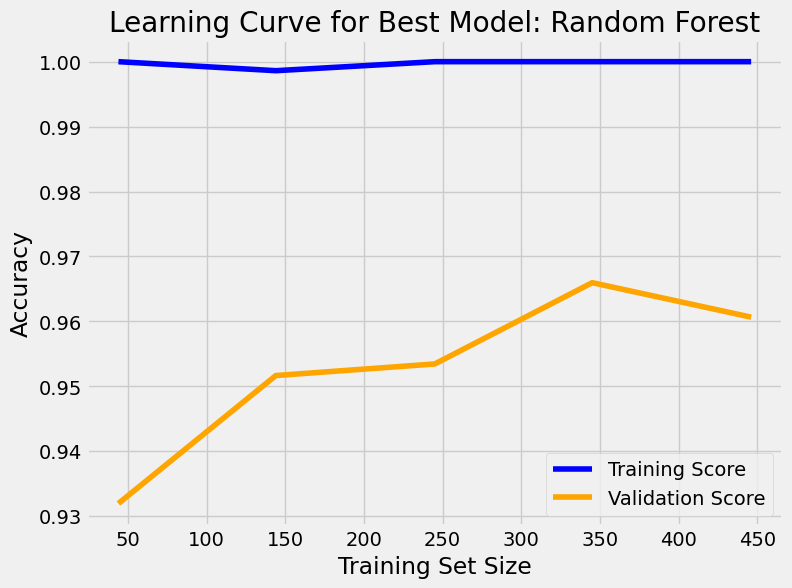

In [34]:
# Assume we already have the results from GridSearchCV stored in grid_search_results
# Now we can simply access those results without rerunning GridSearchCV.

# Initialize variables for the best model
best_model_name = None
best_model = None
best_score = 0

# Identify the best model from the stored grid_search_results
for model_name, grid_search in grid_search_results.items():
    if grid_search.best_score_ > best_score:
        best_model_name = model_name
        best_model = grid_search.best_estimator_
        best_score = grid_search.best_score_

print(f"Best model: {best_model_name} with score: {best_score}")

# Plot the learning curve for the best model
print(f"Generating learning curve for {best_model_name}...")
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='accuracy')

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score', color='blue')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score', color='orange')

# Labeling the axes
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')

# Adding the title and legend
plt.title(f'Learning Curve for Best Model: {best_model_name}')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

## 6.3 Model Selection and Hyperparameter Optimization with GridSearchCV with Balance Regularization

In [35]:
# Define the models and their hyperparameters to test
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'SVM': SVC(class_weight='balanced', probability=True),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Define the hyperparameters for GridSearchCV
param_grid = {
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance']
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

# Create a dictionary to store the results of GridSearchCV for each model
grid_search_results = {}

# For each model, apply GridSearchCV and display the best parameters and performance
for model_name, model in models.items():
    print(f"Testing {model_name}...")

    # Define GridSearchCV for each model
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], 
                               cv=5, scoring='f1_weighted', n_jobs=-1)
    
    # Train with the data
    grid_search.fit(X_train, y_train)
    
    # Store the results in the dictionary
    grid_search_results[model_name] = grid_search
    
    # Best hyperparameters and performance
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best F1-Weighted Score for {model_name}: {grid_search.best_score_}")
    
    # Prediction on the test set
    y_pred = grid_search.predict(X_test)
    
    # Display the classification report (F1, Precision, Recall)
    print(classification_report(y_test, y_pred))
    
    # Calculate and display ROC AUC score
    roc_auc = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
    print(f"ROC AUC Score for {model_name}: {roc_auc}")
    
    print("-" * 50)

Testing Logistic Regression...


C:\Users\sacha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Best Parameters for Logistic Regression: {'C': 100}
Best F1-Weighted Score for Logistic Regression: 0.9386415048667306
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       128
           1       0.58      0.92      0.71        12

    accuracy                           0.94       140
   macro avg       0.79      0.93      0.84       140
weighted avg       0.96      0.94      0.94       140

ROC AUC Score for Logistic Regression: 0.9856770833333333
--------------------------------------------------
Testing Random Forest...
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Best F1-Weighted Score for Random Forest: 0.9701886649159578
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       128
           1       0.82      0.75      0.78        12

    accuracy                           0.96       140
   macro avg       0.90      0.87      0.

# Visualizing learning curve

Best model: Random Forest with score: 0.9701886649159578
Generating learning curve for Random Forest...


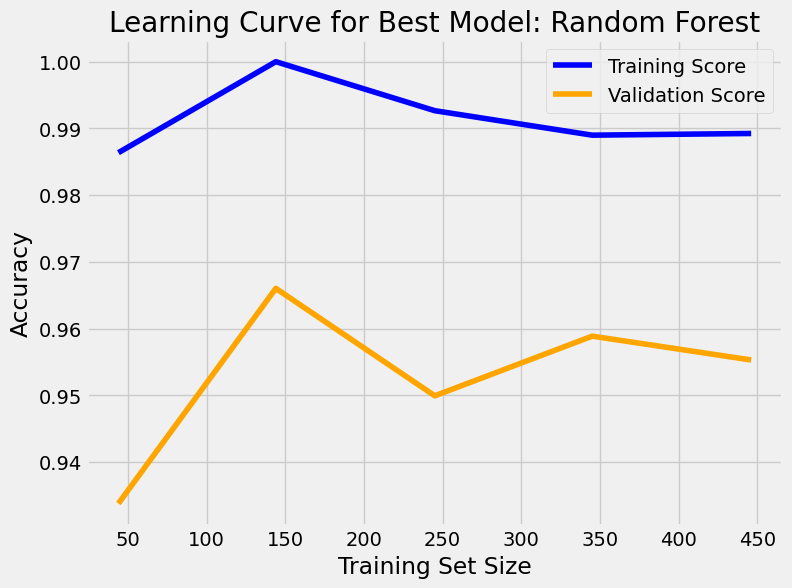

In [36]:
# Assume we already have the best models from the initial GridSearchCV stored in grid_search_results
best_model_name = None
best_model = None
best_score = 0

# Identify the best model from the stored grid_search_results
for model_name, grid_search in grid_search_results.items():
    if grid_search.best_score_ > best_score:
        best_model_name = model_name
        best_model = grid_search.best_estimator_
        best_score = grid_search.best_score_

print(f"Best model: {best_model_name} with score: {best_score}")

# Plot the learning curve for the best model
print(f"Generating learning curve for {best_model_name}...")
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='accuracy')

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score', color='blue')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score', color='orange')

# Labeling the axes
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')

# Adding the title and legend
plt.title(f'Learning Curve for Best Model: {best_model_name}')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

### Note
In the first attempt, we focused on achieving higher accuracy, but the F1 score is a better indicator when dealing with unbalanced classes, as in our case.
_ _ _
We chose to go with the Random Forest model because it achieved better results 
compared to other models, particularly in balancing the performance for both 
top and non-top artists. 
_ _ _
**Logistic Regression:**
Performs well overall but struggles with precision for the minority class, despite high recall and good class separation.

**Random Forest:**
Highly accurate and balanced, though it could better capture true positives for the minority class.

**SVM:**
Excellent class separation but lacks precision for the minority class, even with high recall.

**KNN:**
Decent for simpler problems but struggles with recall and class separation.

**Gradient Boosting:**
Robust and well-balanced, effectively identifying true positives for the minority class.

## 6.4 Best Model: Random Forest 

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       128
           1       0.82      0.75      0.78        12

    accuracy                           0.96       140
   macro avg       0.90      0.87      0.88       140
weighted avg       0.96      0.96      0.96       140



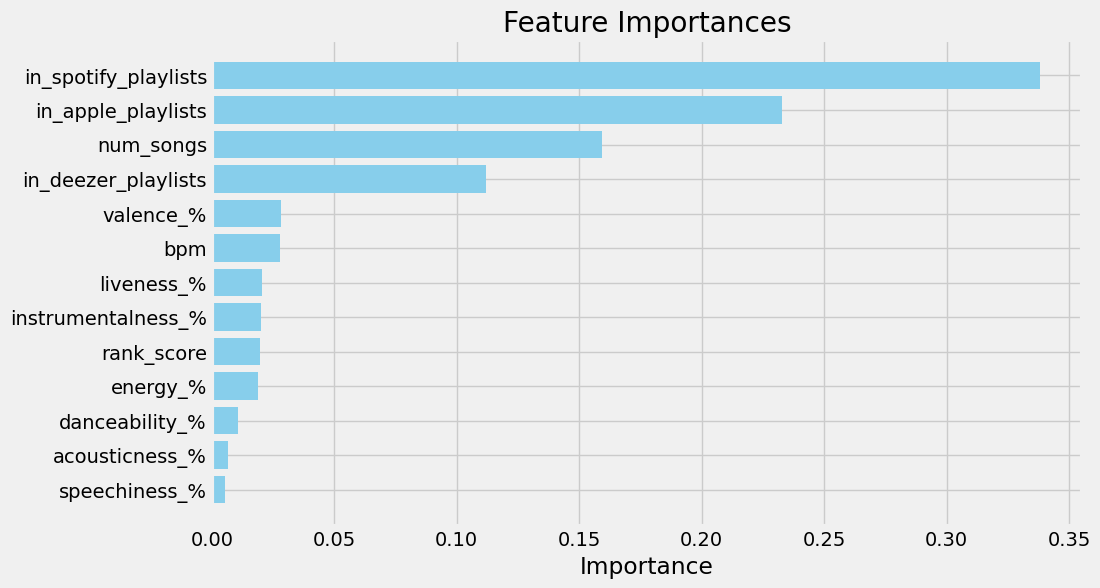

In [37]:
# Initialize the model with the best hyperparameters
# model = RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200, random_state=42)

# Train the model
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save the model for future use
joblib.dump(best_model, 'random_forest_model.pkl')

# Display feature importances
importances = best_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)


# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important feature at the top
plt.show()

## 6.5 Evaluation

In [38]:
# Predictions on the training set
y_train_pred = best_model.predict(X_train)

# Predictions on the test set
y_test_pred = best_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate precision, recall, F1-score
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Calculate ROC AUC
train_roc_auc = roc_auc_score(y_train, best_model.predict_proba(X_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# Print results
print(f"Training accuracy : {train_accuracy}")
print(f"Test accuracy : {test_accuracy}")
print(f"Training precision : {train_precision}")
print(f"Test precision : {test_precision}")
print(f"Training recall : {train_recall}")
print(f"Test recall : {test_recall}")
print(f"Training F1-score : {train_f1}")
print(f"Test F1-score : {test_f1}")
print(f"Training ROC AUC : {train_roc_auc}")
print(f"Test ROC AUC : {test_roc_auc}")

Training accuracy : 0.9910394265232975
Test accuracy : 0.9642857142857143
Training precision : 0.9206349206349206
Test precision : 0.8181818181818182
Training recall : 1.0
Test recall : 0.75
Training F1-score : 0.9586776859504132
Test F1-score : 0.782608695652174
Training ROC AUC : 0.9994482758620689
Test ROC AUC : 0.984375


#### The model performs exceptionally well on the training set, showing strong accuracy and balanced metrics. However, test performance drops, particularly in precision, recall, and F1-score, suggesting slight overfitting. Despite this, the consistently high ROC AUC scores indicate reliable class distinction.

In [39]:
scores = cross_val_score(best_model, X, y, cv=5)
print("Cross-validation : ", scores)
print("Average score : ", scores.mean())

Cross-validation :  [0.98571429 0.96428571 0.95714286 0.94964029 0.95683453]
Average score :  0.9627235354573485


#### The cross-validation results show consistent performance across different data splits, indicating strong generalization and stability. The model demonstrates robust and reliable results on unseen data, with no signs of overfitting.

## 6.6 Confusion Matrix 

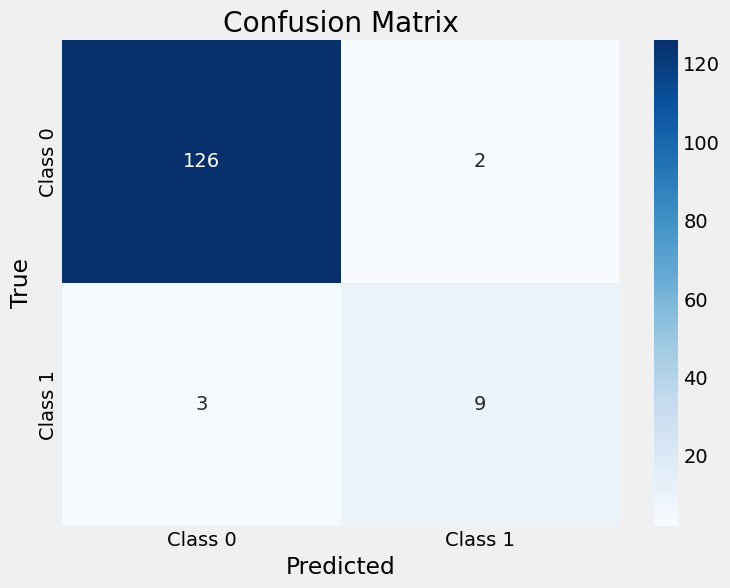

In [40]:
# Confusion Matrix (for the test set)
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### The confusion matrix shows that the model performs very well in identifying "Non Top Artists" with 126 correct predictions and only 2 errors, while for "Top Artists," it correctly identifies 9 cases but misclassifies 3, suggesting potential improvements through class balancing or threshold adjustments.

## 6.7 Prediction of Top Artists: Comparing Model Predictions with Actual Labels

In [41]:
# Create a copy of the X_test
X_test_with_preds = X_test.copy()

# Add  predictions and actual values
X_test_with_preds['predictions'] = y_pred
X_test_with_preds['actual'] = y_test

# Merge with the original dataset to get the artist's name
predicted_top_artists = X_test_with_preds[X_test_with_preds['predictions'] == 1]

predicted_top_artists = predicted_top_artists.merge(new_data[['Artist']], left_index=True, right_index=True)

# Display the results of the predictions and acctual values
print("Predictions vs Actual for Top Artists:")
print(predicted_top_artists[['Artist', 'actual', 'predictions']])

Predictions vs Actual for Top Artists:
             Artist  actual  predictions
300   Justin Bieber       1            1
78         Beyoncï¿       0            1
133        Coldplay       1            1
181        Dua Lipa       1            1
516  Rauw Alejandro       1            1
352   Lewis Capaldi       1            1
634     Tiï¿½ï¿½sto       0            1
2         21 Savage       1            1
244          Halsey       1            1
60              BTS       1            1
310         Karol G       1            1


# 7. Clustering and Visualization of Artists Using PCA and K-Means

## 7.1 PCA for Dimensionality Reduction and K-Means Clustering

In [42]:
import matplotlib.cm as cm
cmap = cm.get_cmap('Dark2', 3)  # Colormap for 3 clusters

C:\Users\sacha\AppData\Local\Temp\ipykernel_9676\2667336423.py:2: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



C:\Users\sacha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\sacha\AppData\Local\Temp\ipykernel_9676\3381027387.py:15: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

C:\Users\sacha\AppData\Local\Temp\ipykernel_9676\3381027387.py:30: UserWarning:

You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



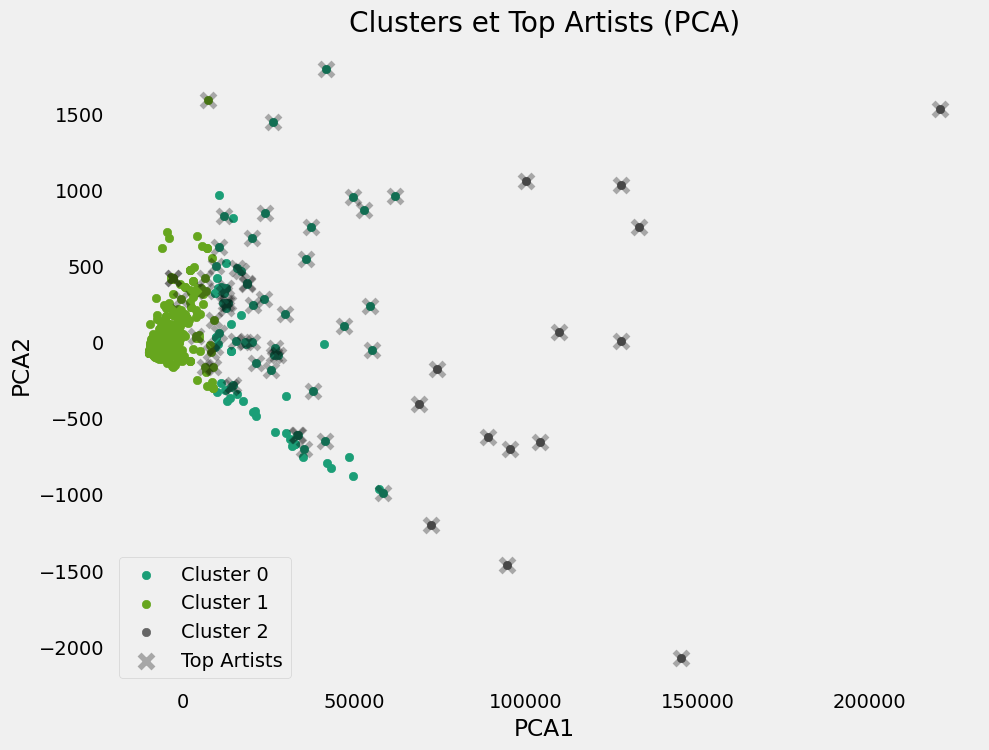

                                               Artist  Cluster  top_artist
2                                           21 Savage        0           1
17                                              Adele        0           1
45                                             Arcane        1           1
47                                     Arctic Monkeys        2           1
48                                      Ariana Grande        0           1
53                                             Avicii        0           1
60                                                BTS        0           1
66                                          Bad Bunny        2           1
82                                      Billie Eilish        0           1
84                                           Bizarrap        0           1
0                                            (G)I-DLE        1           0
1                                           070 Shake        1           0
3                        

In [43]:
# Step 1: Dimensionality reduction with PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)  # Réduire les dimensions à 2

# Step 2: Clustering with K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters pour démonstration
clusters = kmeans.fit_predict(X_pca)

# Create a colormap for the clusters
new_data['Cluster'] = clusters
new_data['PCA1'] = X_pca[:, 0]
new_data['PCA2'] = X_pca[:, 1]

# Create a colormap for clusters
cmap = cm.get_cmap('Dark2', 3)  # Colormap for 3 clusters

# Visualize the clusters
plt.figure(figsize=(10, 8))
for cluster in range(3):
    cluster_data = new_data[new_data['Cluster'] == cluster]
    plt.scatter(
        cluster_data['PCA1'], 
        cluster_data['PCA2'], 
        color=cmap(cluster), 
        label=f"Cluster {cluster}"
    )

# Add Top Artists to the plot
top_artists = new_data[new_data['top_artist'] == 1]
plt.scatter(
    top_artists['PCA1'], 
    top_artists['PCA2'], 
    color='black', 
    marker='x', 
    alpha=0.3, 
    label='Top Artists', 
    edgecolor='black', 
    s=100
)

plt.title("Clusters et Top Artists (PCA)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.grid()
plt.show()

# Select the top 10 top artists and 10 non-top artists with their clusters
top_artists_sample = new_data[new_data['top_artist'] == 1].head(10)
non_top_artists_sample = new_data[new_data['top_artist'] == 0].head(10)

# Concatenate the two samples
sampled_data = pd.concat([top_artists_sample, non_top_artists_sample])

# Display a preview of the clusters
print(sampled_data[['Artist', 'Cluster', 'top_artist']])

## 7.2 Summary Table of Top and Non-Top Artists per Cluster

In [44]:
# Count the number of top artists in each cluster
top_artist_counts = new_data[new_data['top_artist'] == 1].groupby('Cluster').size()

# Count the number of non-top artists in each cluster
non_top_artist_counts = new_data[new_data['top_artist'] == 0].groupby('Cluster').size()

# Total observations per cluster
total_counts = new_data.groupby('Cluster').size()

# Build a summary table
summary_table = pd.DataFrame({
    'Total Observations': total_counts,
    'Top Artists': top_artist_counts,
    'Non-Top Artists': non_top_artist_counts
}).fillna(0).astype(int)  # Remplir les NaN par 0 et convertir en entier

# Display the summary table
print("\nSummary Table:")
print(summary_table)

# Ajouter 5 artistes par cluster
print("\nExample of 10 artists per cluster:\n")
for cluster in new_data['Cluster'].unique():
    print(f"Cluster {cluster} :")
    cluster_sample = new_data[new_data['Cluster'] == cluster][['Artist']].head(10)
    print(cluster_sample.to_string(index=False))  
    print("-" * 40)  


Summary Table:
         Total Observations  Top Artists  Non-Top Artists
Cluster                                                  
0                        86           45               41
1                       598           11              587
2                        14           14                0

Example of 10 artists per cluster:

Cluster 1 :
                                              Artist
                                            (G)I-DLE
                                           070 Shake
                                            24kgoldn
                                                2Pac
                                            347aidan
4*TOWN (From Disney and Pixarï¿½ï¿½ï¿½s Turning Red)
                              A Boogie Wit da Hoodie
                                          A$AP Rocky
                                              ACRAZE
                                          AP Dhillon
----------------------------------------
Cluster 0 :
        A

#### The clustering results reveal three distinct groups. Cluster 0 presents a balanced mix of both Top and Non-Top artists, featuring globally popular names like Adele, BTS, and Billie Eilish. Cluster 1 is dominated by Non-Top artists, which suggests a focus on emerging or niche talent. Finally, Cluster 2 consists exclusively of Top artists, including major names like Bad Bunny, Drake, and Ed Sheeran.   
#### This segmentation effectively categorizes artists based on their popularity and potential market reach, offering valuable insights into audience preferences and trends.

# 8. Neural Network
## 8.1 Generic NN

C:\Users\sacha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8822 - loss: 0.5403 - val_accuracy: 0.8643 - val_loss: 0.4506
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9342 - loss: 0.3532 - val_accuracy: 0.9000 - val_loss: 0.3269
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9210 - loss: 0.2292 - val_accuracy: 0.9000 - val_loss: 0.2631
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9347 - loss: 0.2094 - val_accuracy: 0.9000 - val_loss: 0.2245
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9671 - loss: 0.1433 - val_accuracy: 0.9000 - val_loss: 0.1950
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9521 - loss: 0.1290 - val_accuracy: 0.9000 - val_loss: 0.1997
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9318 - loss: 0.1126 - val_accuracy: 0.9000 - val_loss: 0.2050
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9416 - loss: 0.0937 - val_accuracy: 0.9143 - val

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


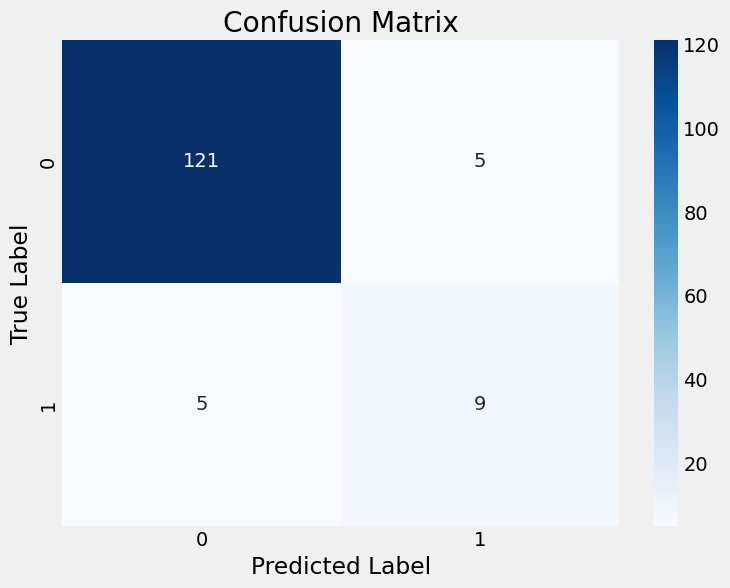

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       126
           1       0.64      0.64      0.64        14

    accuracy                           0.93       140
   macro avg       0.80      0.80      0.80       140
weighted avg       0.93      0.93      0.93       140



In [45]:
# Assuming 'df' is your DataFrame and you want to predict 'top_artist' (binary classification)
new_data = df

# Add 'key' and 'mode' to X
X['key'] = df['key']  # Add the 'key' column
X['mode'] = df['mode']  # Add the 'mode' column

# Numeric columns: all except for the categorical variables 'key' and 'mode'
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Categorical columns to encode
categorical_columns = ['key', 'mode']

# Create the LabelEncoder for 'mode'
mode_encoder = LabelEncoder()

# Encode 'mode' as numeric (0 for Minor, 1 for Major)
X['mode'] = mode_encoder.fit_transform(X['mode'])

# 'key' can be treated as a direct numeric variable, so no encoding is necessary for it
# If you want to treat it as categorical, you can use OneHotEncoder
# key_encoder = OneHotEncoder(sparse=False)
# X_encoded = key_encoder.fit_transform(X[['key']])

# Now we scale the numeric variables
scaler = StandardScaler()

# Create the preprocessing pipeline that normalizes the data and encodes the categorical variables
X_processed = scaler.fit_transform(X[numerical_columns])

# Combine the preprocessed numeric variables with the already encoded categorical variables
X_processed = pd.DataFrame(X_processed, columns=numerical_columns)

# Now we can split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, stratify=y)

# Compute class weights to handle imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))

# Build the Neural Network model (Binary classification)
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))  # Optional: helps with regularization
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model (use binary_crossentropy for binary classification)
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                    validation_data=(X_test, y_test), 
                    class_weight=class_weights)

# Evaluate the model
score = model.evaluate(X_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Predictions (binary)
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

#### The model performs excellently, with nearly perfect predictions for the majority class and good performance for the minority class, despite having fewer examples. 
#### The class imbalance is visible in the support numbers, suggesting that balancing techniques like SMOTE might improve the performance for the minority class even further.

## 8.2 SMOTE

In [46]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution after SMOTE:
top_artist
0    502
1    502
Name: count, dtype: int64


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9985 - loss: 0.0152 - val_accuracy: 0.9357 - val_loss: 0.3272
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9979 - loss: 0.0110 - val_accuracy: 0.9357 - val_loss: 0.3259
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9989 - loss: 0.0105 - val_accuracy: 0.9286 - val_loss: 0.3314
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9979 - loss: 0.0159 - val_accuracy: 0.9357 - val_loss: 0.3299
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9948 - loss: 0.0145 - val_accuracy: 0.9357 - val_loss: 0.3458
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9994 - loss: 0.0085 - val_accuracy: 0.9286 - val_loss: 0.3562
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9981 - loss: 0.0070 - val_accuracy: 0.9357 - val_loss: 0.3600
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9996 - loss: 0.0051 - val_accuracy: 0.9357 - val_loss

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


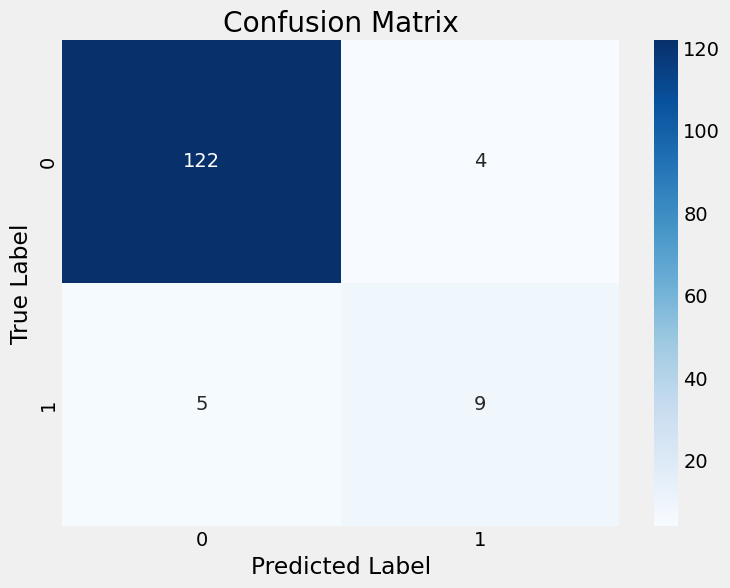

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       126
           1       0.69      0.64      0.67        14

    accuracy                           0.94       140
   macro avg       0.83      0.81      0.82       140
weighted avg       0.93      0.94      0.93       140



In [47]:
# Refill the model with the resampled data
model.fit(X_train_resampled, y_train_resampled, 
          epochs=50, batch_size=32, 
          validation_data=(X_test, y_test),
          class_weight=None)  # No longer needed class weights with SMOTE

# Evaluate the model
score = model.evaluate(X_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Predictions (binary)
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

#### The model shows excellent overall performance after applying SMOTE. For the majority class, it maintains near-perfect precision and recall. The minority class shows good but somewhat lower performance, with a slight tendency to miss some positive cases. 
#### Despite using SMOTE to address class imbalance, there's still room for improvement in identifying minority class instances, though the model remains highly reliable overall.

In [47]:
X_test_artists = df.loc[X_test.index, 'Artist']  

results_df = pd.DataFrame({'Artist': X_test_artists.values,  
                           'actual': y_test.values,
                           'predictions': y_pred.flatten()})

top_artists_results = results_df[results_df['actual'] == 1]

print("\nPredictions vs Actual for Top Artists:")
print(top_artists_results)



Predictions vs Actual for Top Artists:
               Artist  actual  predictions
2               Adele       1            1
4              Avicii       1            0
21         Juice WRLD       1            0
26         Bruno Mars       1            1
51   The Chainsmokers       1            1
62             WizKid       1            0
63           Dua Lipa       1            1
66    Imagine Dragons       1            1
105            Eminem       1            1
110     Glass Animals       1            0
117         Lady Gaga       1            1
123    Arctic Monkeys       1            1
124              Joji       1            0
127       Jhay Cortez       1            1
